(1.0, 5.0)

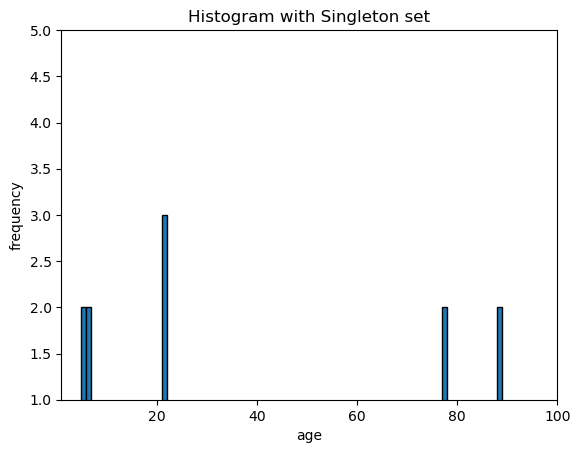

In [1]:
import matplotlib.pyplot as plt
age=[5,5,6,6,77,77,88,88,21,21,21]
plt.hist(age,bins=range(min(age),max(age)+2),edgecolor="black")
plt.title("Histogram with Singleton set")
plt.xlabel("age")
plt.ylabel("frequency")
plt.xlim(1,100)
plt.ylim(1,5)

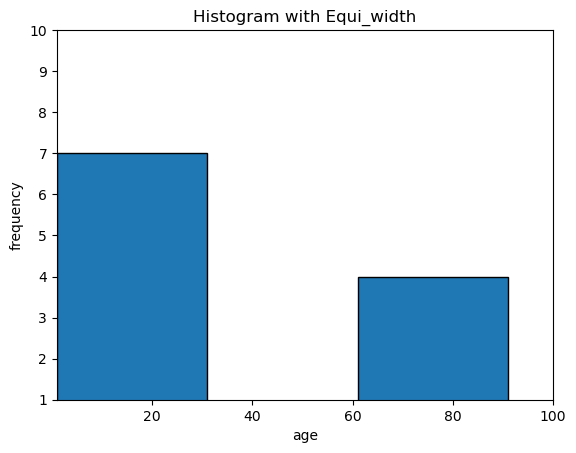

In [2]:
import matplotlib.pyplot as plt
plt.hist(age,bins=[1,31,61,91],edgecolor="black")
plt.title("Histogram with Equi_width")
plt.xlabel("age")
plt.ylabel("frequency")
plt.xlim(1,100)
plt.ylim(1,10)
plt.show()

In [3]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


import pandas as pd 
df=pd.read_csv("Groceries_dataset.csv")
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [5]:
!python --version

Python 3.11.7


In [6]:
basket=df.groupby(['Member_number','Date'])['itemDescription'].apply(list)
transactions=basket.tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [7]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_array=te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_array, columns=te.columns_)

In [8]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_encoded,min_support=0.01,use_colnames=True)
print("Total Frequent Itemsets:",frequent_itemsets.shape[0])

Total Frequent Itemsets: 69


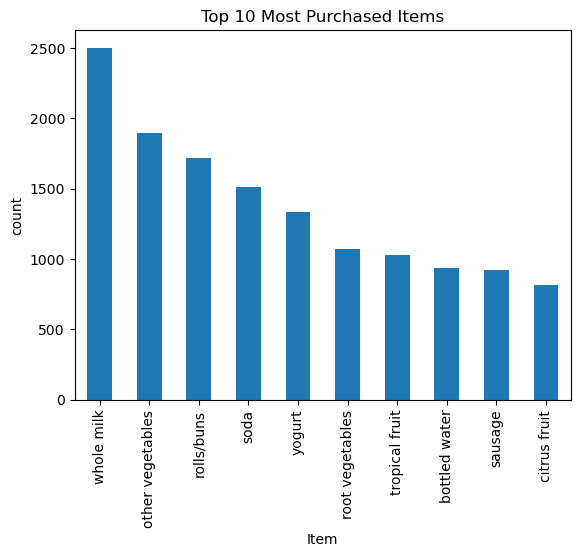

In [9]:
import matplotlib.pyplot as plt
top_items=df['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar' , title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("count")
plt.show()

In [10]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules=rules[rules['antecedents'].apply(lambda x: len(x)>=1) & rules['consequents'].apply(lambda x: len(x)>=1)]
print("Association Rules:",rules.shape[0])
rules[['antecedents','consequents','support','confidence','lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


In [11]:
df1=pd.read_csv("online_food_transactions.csv")
df1.head()

,TID,Items
0,1,"Idli,Ice Cream,Samosa,Paratha"
1,2,"Pizza,Fries,Coke,Tea,Juice,Biryani"
2,3,"Burger,Biryani,Samosa,Paneer"
3,4,"Pepsi,Tea,Sandwich,Pizza,Dosa,Burger"
4,5,"Pepsi,Coffee,Coke"
